<a href="https://colab.research.google.com/github/Karisjk/loan-prediction-system-using-Logistic-Regression/blob/main/predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas


In [8]:
import pandas as pd
file_path="/content/vehicle.csv"
data=pd.read_csv (file_path)
print(data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [9]:
print(data.info())
print (data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000

**checking for missing values **

In [10]:
print (data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


feature engineering

In [12]:
# dropping irrelevant column
data=data.drop ('name', axis=1)

In [13]:
#creating new features car_age
data['car_age']=2024-data['year']
data=data.drop('year', axis=1)


In [23]:
#encoding categorical data
data1=pd.get_dummies(data, drop_first=True)
print(data.head())


   selling_price  km_driven  car_age  fuel_Diesel  fuel_Electric  fuel_LPG  \
0          60000      70000       17        False          False     False   
1         135000      50000       17        False          False     False   
2         600000     100000       12         True          False     False   
3         250000      46000        7        False          False     False   
4         450000     141000       10         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                 True  

In [24]:
print (data1.dtypes)

selling_price                   int64
km_driven                       int64
car_age                         int64
fuel_Diesel                      bool
fuel_Electric                    bool
fuel_LPG                         bool
fuel_Petrol                      bool
seller_type_Individual           bool
seller_type_Trustmark Dealer     bool
transmission_Manual              bool
owner_Fourth & Above Owner       bool
owner_Second Owner               bool
owner_Test Drive Car             bool
owner_Third Owner                bool
age_segment_New                  bool
age_segment_Old                  bool
dtype: object


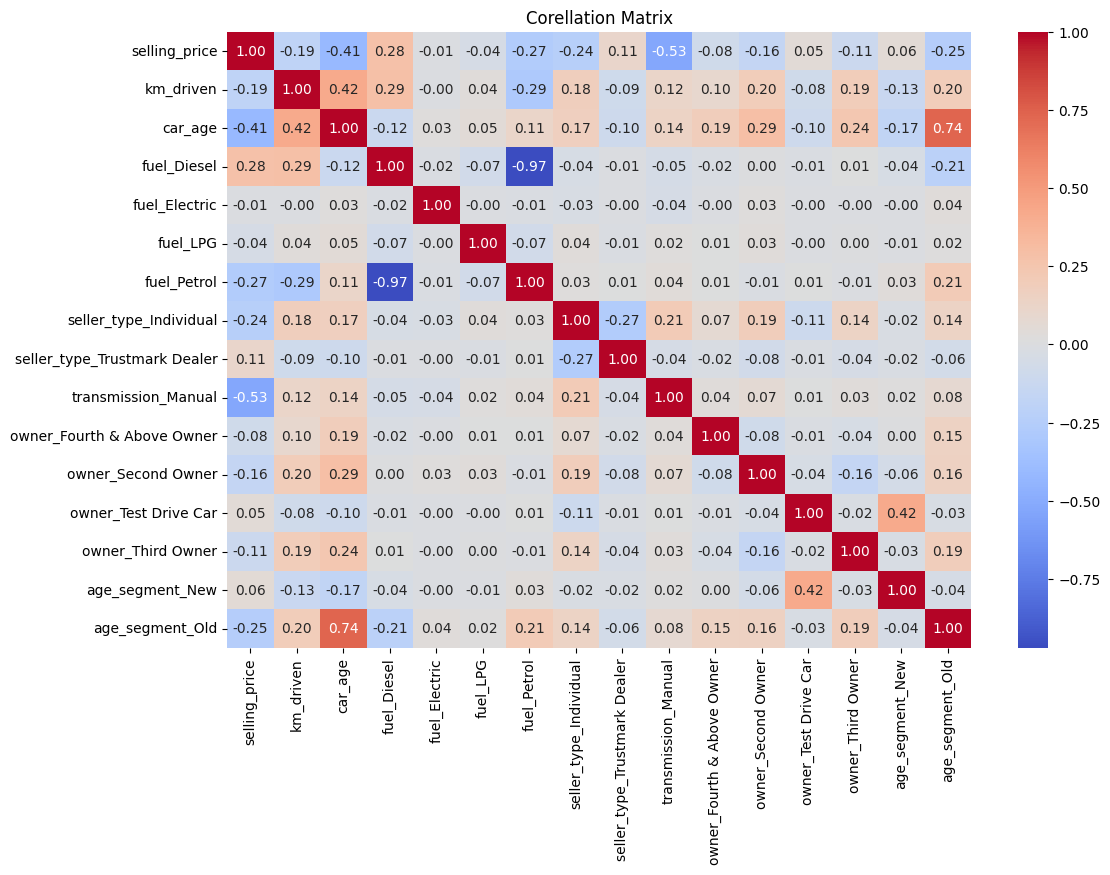

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corellation Matrix")
plt.show()

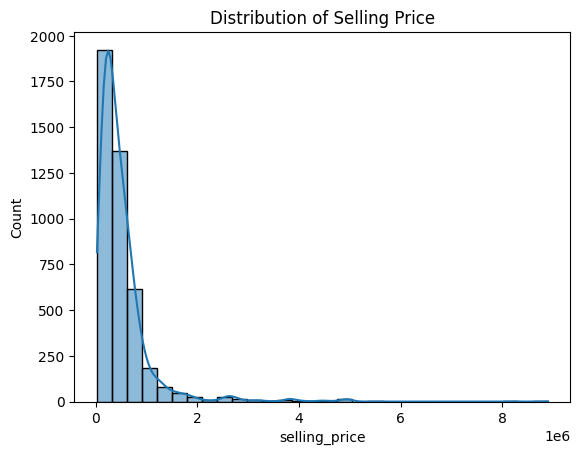

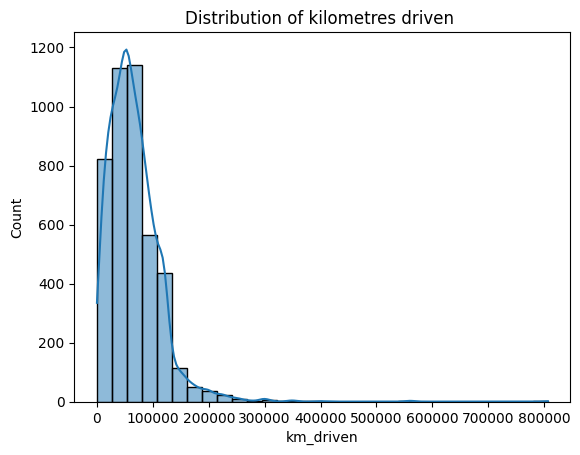

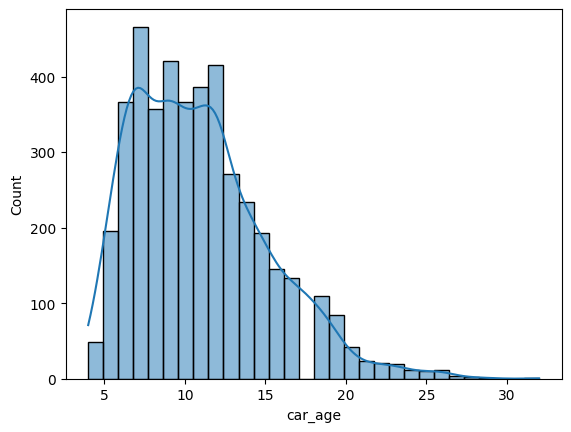

In [26]:
sns. histplot(data1['selling_price'], kde=True, bins=30)
plt.title("Distribution of Selling Price")
plt.show()

sns.histplot(data1['km_driven'], kde=True, bins=30)
plt.title("Distribution of kilometres driven ")
plt.show()

sns.histplot(data1['car_age'], kde=True, bins=30)
plt.show("Distribution of Car Age")
plt.show()

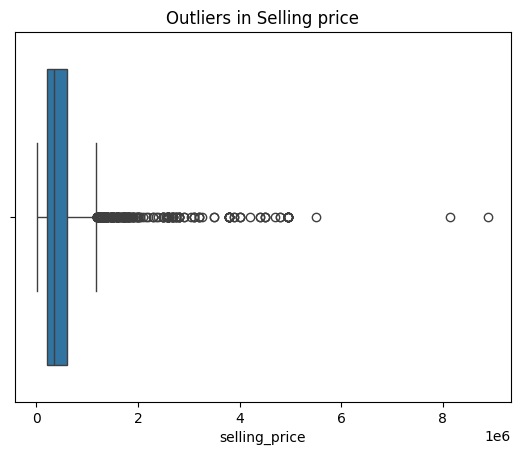

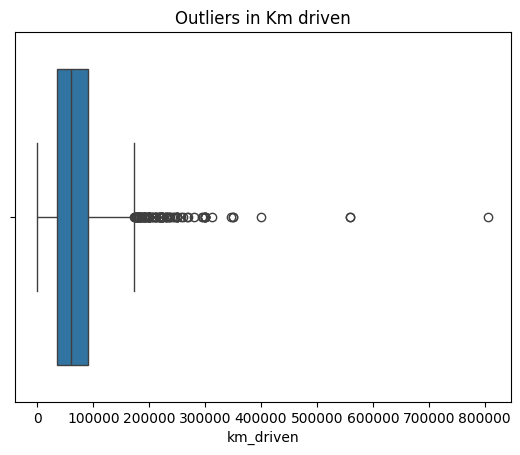

In [27]:
# checking for outliers
sns.boxplot(x=data1['selling_price'])
plt.title("Outliers in Selling price")
plt.show()

sns.boxplot(x=data1['km_driven'])
plt.title("Outliers in Km driven")
plt.show()

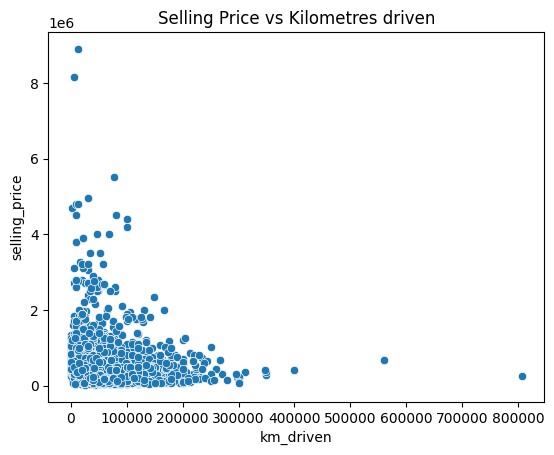

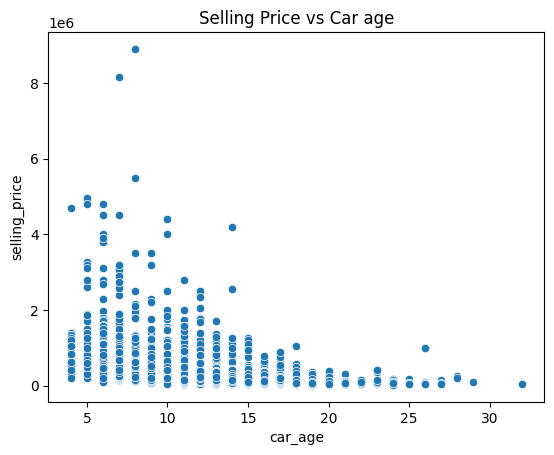

In [28]:
#relationship analysis
sns.scatterplot(x='km_driven', y='selling_price', data=data1)
plt.title("Selling Price vs Kilometres driven")
plt.show()

sns.scatterplot(x='car_age', y='selling_price', data=data1)
plt.title("Selling Price vs Car age")
plt.show()

lets remove the outliers in the data

In [30]:
Q1=data1['selling_price'].quantile(0.25)
Q3= data1['selling_price'].quantile(0.75)
IQR =Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
filtered_data1= data1[(data1['selling_price']>=lower_bound)&(data1['selling_price']<=upper_bound)]
print(f"Original dataset size: {len(data1)}")
print(f"Filtered dataset size: {len(filtered_data1)}")

Original dataset size: 4340
Filtered dataset size: 4069


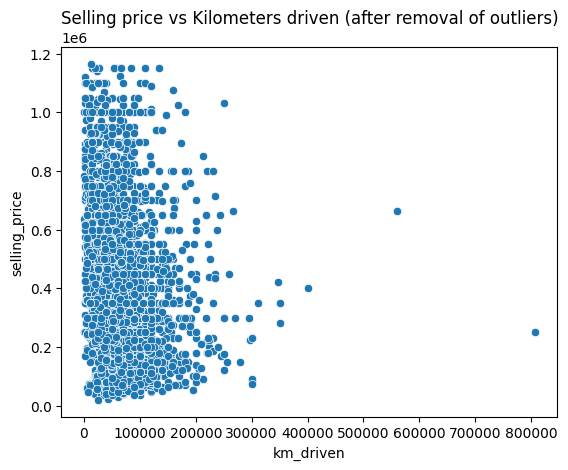

In [31]:
#visualizing after removing outliers
sns.scatterplot(data=filtered_data1, x='km_driven', y= 'selling_price')
plt.title("Selling price vs Kilometers driven (after removal of outliers)")
plt.show()

using the selling price as the output

In [34]:
#dropping the target variable
y=filtered_data1['selling_price']
X= filtered_data1.drop(columns=['selling_price'])

spliting the data

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size {len(X_test)}")

Training set size: 3255, Test set size 814


normalizing the dataset

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_model= RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred=rf_model.predict(X_test)
#evaluating the  model
f=rf_mse=mean_squared_error(y_test, rf_y_pred)
rf_mae=mean_absolute_error(y_test, rf_y_pred)
rf_r2=r2_score(y_test, rf_y_pred)

#output of evaluation model
print(f"Random Forest- Mean squared error: {rf_mse}")
print(f"random forest- mean Absolute error: {rf_mae}")
print(f"Random Forest - R-squared: {rf_r2}")

Random Forest- Mean squared error: 26923579897.737206
random forest- mean Absolute error: 112730.69196523393
Random Forest - R-squared: 0.5353004816902318


hyperparameter tuning using Grid search

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_estimators':[50,100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}


grid_search= GridSearchCV(estimator= RandomForestRegressor(random_state=42),
                          param_grid=param_grid,
                          cv=3,
                          n_jobs=-1,
                          scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Best Parameters :{grid_search.best_params_}")
best_rf_model= grid_search.best_estimator_

best_rf_y_pred= best_rf_model.predict(X_test)
best_rf_mse= mean_squared_error(y_test, best_rf_y_pred)
best_rf_mae= mean_absolute_error(y_test, best_rf_y_pred)
best_rf_r2= r2_score(y_test, best_rf_y_pred)

print(f"Best random forest -MSE: {best_rf_mse}")
print(f"best random forest- mae: {best_rf_mse}")
print(f"best random forest- R2: {best_rf_r2}")

Best Parameters :{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best random forest -MSE: 24089863886.124424
best random forest- mae: 24089863886.124424
best random forest- R2: 0.5842102652563395


using Gradient Boosting model to train the model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Output evaluation metrics
print(f"Gradient Boosting - Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting - Mean Absolute Error: {gb_mae}")
print(f"Gradient Boosting - R-squared: {gb_r2}")


Gradient Boosting - Mean Squared Error: 24926103120.635857
Gradient Boosting - Mean Absolute Error: 113198.37878662538
Gradient Boosting - R-squared: 0.5697768217490052


hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1,0.2],
    'subsample': [0.8, 1.0]

}


grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb,
                              cv=3,
                              n_jobs=-1,
                              scoring='r2')

grid_search_gb.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_gb.best_params_}")


best_gb_model = grid_search_gb.best_estimator_

best_gb_y_pred = best_gb_model.predict(X_test)
best_gb_mse = mean_squared_error(y_test, best_gb_y_pred)
best_gb_mae = mean_absolute_error(y_test, best_gb_y_pred)
best_gb_r2 = r2_score(y_test, best_gb_y_pred)

print(f"Best Gradient Boosting - MSE: {best_gb_mse}")
print(f"Best Gradient Boosting - MAE: {best_gb_mae}")
print(f"Best Gradient Boosting - R2: {best_gb_r2}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best Gradient Boosting - MSE: 24331615974.067913
Best Gradient Boosting - MAE: 110781.06805030609
Best Gradient Boosting - R2: 0.5800376374243639


In [48]:
import joblib
joblib.dump(best_gb_model, 'gradient_boosting_model.pkl')
print("Model saved successfully")

Model saved successfully


In [ ]:
#